¿Qué es una imagen?62..3
+

```
# This is formatted as code
```



In [2]:
#Montar drive y cargar datos
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4Jz94hxKZPUledY6kHYR8jwjT-BgHgrIB-APWf3ZO5g4ruQIvJMzs
Mounted at /content/drive


In [3]:
folder = "/content/drive/MyDrive/Data-clustering/"

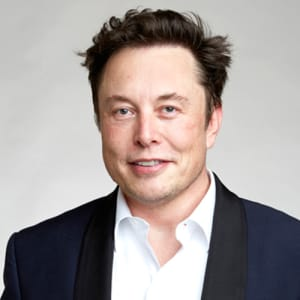

In [4]:
from IPython.display import Image
Image (folder + "elon.jpg")

Open CV

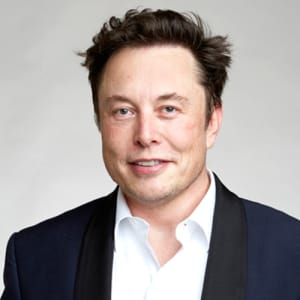

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow

#Lectura

imagen = cv.imread(folder + "elon.jpg")

#cv.imshow(image)
cv2_imshow(imagen)

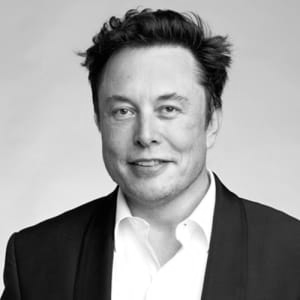

In [6]:
#Convertir a 1 canal
gray = cv.cvtColor(imagen, code = 7) #RGB2GRAY
cv.imwrite("elon_gris.jpg", gray)
cv2_imshow(gray)

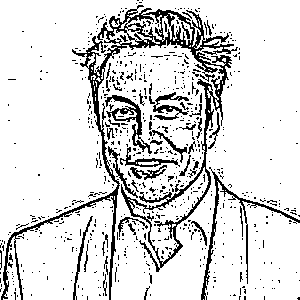

In [9]:
import matplotlib.pyplot as plt
#Treshold
th2 = cv.adaptiveThreshold(gray,255, cv.ADAPTIVE_THRESH_MEAN_C, \
                           cv.THRESH_BINARY, 5,2)
th3 = cv.adaptiveThreshold(gray,255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, \
                           cv.THRESH_BINARY, 5,2)
cv2_imshow(th2)

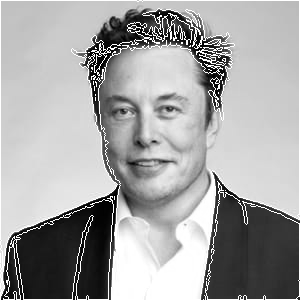

In [12]:
#Contnorno
contorno = cv.findContours(th2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) [0]
im_c = cv.drawContours(gray, contorno, -1, (255,255, 255), 1)
cv2_imshow(im_c)

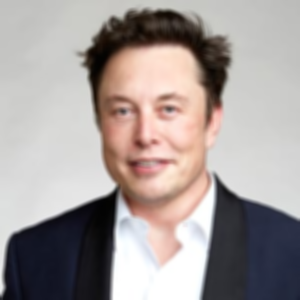

In [14]:
#filtros
blur = cv.blur(imagen, (5,5))
cv2_imshow(blur)

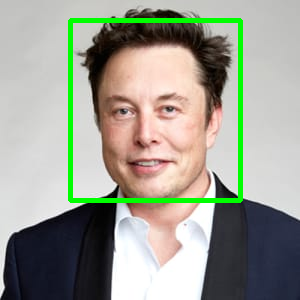

In [15]:
# Dibujar
rec = cv.rectangle(imagen, (70,20), (240,200), (0,255,0), 3)
cv2_imshow(rec)

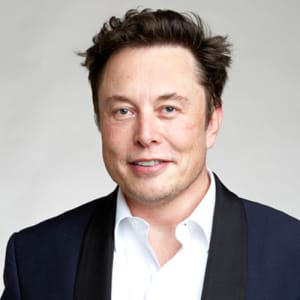

In [17]:
#Abrir una imagen
from PIL import Image
im = Image.open(folder + "elon.jpg")
im

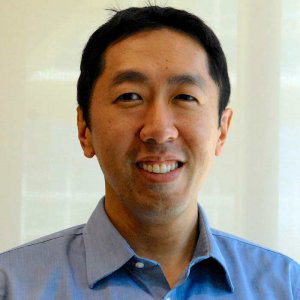

In [18]:
#mezclar 2 imágenes
im2 = Image.open(folder + "andrew.jpg")
im2

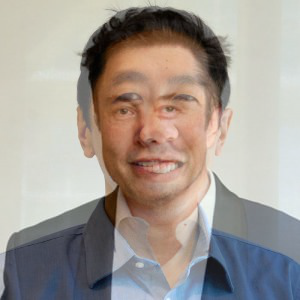

In [19]:
mask = Image.new("L", im.size, 128)
com = Image.composite(im, im2, mask = mask)
com

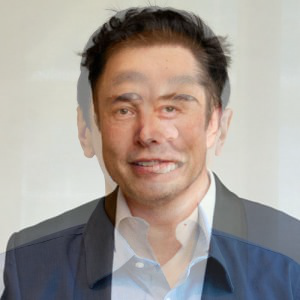

In [22]:
blend = Image.blend(im, im2, 0.4)
blend

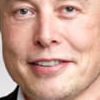

In [23]:
#crop
box = (100, 100, 200, 200)
region = im.crop (box)
region


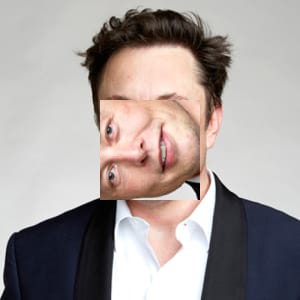

In [25]:
region = region.transpose(Image.ROTATE_90)
im.paste (region, box)
im

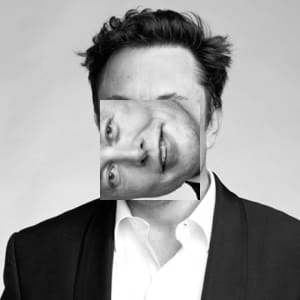

In [26]:
r, g, b = im.split()
g

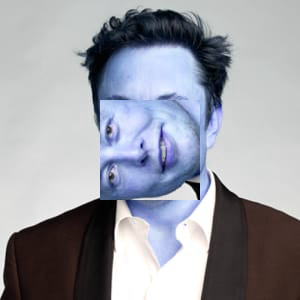

In [27]:
im= Image.merge("RGB", (b, g, r))
im